In [1]:
import numpy as np
import pandas as pd
import math
from functools import reduce
import random
random.seed(2010)

import matplotlib.pyplot as plt
%matplotlib inline

def cost_powers_k(rv, k = 2):
    assert(k!=1)
    if k == 2:
        cutoff = 1<<(int(rv)).bit_length()
    else:
        cutoff = k**(math.ceil(math.log(rv, k)))
    space_cost = cutoff-rv
    time_cost = (cutoff - 1)*1.0/(k-1)
    return (space_cost,time_cost,rv)

def sum_pair_costs(iterator, n,verbose = True):
    sum1,sum2,sum3 = reduce(lambda x,y : (x[0]+y[0],x[1]+y[1],x[2]+y[2]),\
                                        iterator,(0,0,0))
    return (sum1/n,sum2/n,sum3/n)

def cost_iterator(i,cost_func,my_list):
    for x in my_list:
        yield cost_func(x,i)
        
def MakeDiagram(data_location,list_of_funcs,range_for_x = np.linspace(1.02,3,100),
               title = "",x_label = "", y_label = "", line_parameters = [],additional_functions = []):
    val_array = []
    global global_observation_list
    n = 0
    mean = 1    
    with open(data_location,'r') as f:
        for line in f:
            v1,v2 = line.split(',')
            i = int(v2)
            a = int(v1)
            if a<1:
                continue
            n+=i
            mean+=i*a
            while (i>0):
                i-=1
                val_array.append(a)
    mean = mean/n
    assert(mean>1)    
    alpha = (2*mean-1)/(mean-1)
    print("alpha = {}".format(alpha))
    
    X = range_for_x
    list_Y = []
    for _ in range(len(list_of_funcs)):
        list_Y.append([])
    for i in X:
        global_observation_list = None
        for j in range(len(list_of_funcs)):
            list_Y[j].append(list_of_funcs[j](alpha,val_array,i))
    for func in additional_functions:
        func()            
    if len(list_Y) == len(line_parameters):
        for i in range(len(list_Y)):
            if line_parameters[i][0] is None:
                plt.plot(X,list_Y[i],label=line_parameters[i][1])
            else:
                plt.plot(X,list_Y[i],line_parameters[i][0],label=line_parameters[i][1],markevery = 10)
        plt.legend()
            
    else:        
        for Y in list_Y:
            plt.plot(X,Y)
        
    plt.title(title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
#plt.show()
#plt.savefig('results/ungraph_occupancy.png')    
    
    


In [2]:
def cost_powers_k(rv, k = 2):
    assert(k!=1)
    if k == 2:
        cutoff = 1<<(int(rv)).bit_length()
    else:
        cutoff = k**(math.ceil(math.log(rv, k)))
    space_cost = cutoff-rv
    time_cost = (cutoff - 1)*1.0/(k-1)
    return (space_cost,time_cost,rv)

def sum_pair_costs(iterator, n):
    sum1,sum2,sum3 = reduce(lambda x,y : (x[0]+y[0],x[1]+y[1],x[2]+y[2]),\
                                        iterator,(0,0,0))
    return (sum1/n,sum2/n,sum3/n)

global_observation_list = None
beta = .1
def memory_overhead(_, val_array, i):
    global global_observation_list    
    if global_observation_list is None:
        global_observation_list = sum_pair_costs(cost_iterator(i,cost_powers_k,val_array),len(val_array))
    return global_observation_list[0]
def computation_overhead (_, val_array, i):
    global global_observation_list
    if global_observation_list is None:
        global_observation_list = sum_pair_costs(cost_iterator(i,cost_powers_k,val_array),len(val_array))
    return global_observation_list[1]
def mean (_, val_array, i):
    global global_observation_list
    if global_observation_list is None:
        global_observation_list = sum_pair_costs(cost_iterator(i,cost_powers_k,val_array),len(val_array))
    return global_observation_list[2]
def occupancy (_, val_array, i):
    global global_observation_list
    if global_observation_list is None:
        global_observation_list = sum_pair_costs(cost_iterator(i,cost_powers_k,val_array),len(val_array))
    return global_observation_list[2]/(global_observation_list[0]+global_observation_list[2])
def cost ( _, val_array, i):
    global global_observation_list
    if global_observation_list is None:
        global_observation_list = sum_pair_costs(cost_iterator(i,cost_powers_k,val_array),len(val_array))
    return global_observation_list[0] + beta*global_observation_list[1]

estimated_occupancy = lambda a,_,i : ((1-a)/(2-a))*(1-(i-1)/(i-i**(2-a)))
estimated_memory = lambda a,_,i :  (i-1)/(1-i**(2-a)) + 1/(2-a)
estimated_mean = lambda a,_,i : (a-1)/(a-2)
estimated_computation = lambda a,_,i :  1/(1-i**(2-a))
estimated_cost = lambda a,_,i :  estimated_memory(a,_,i) + beta*estimated_computation(a,_,i)

alpha = 2.0237927571316328


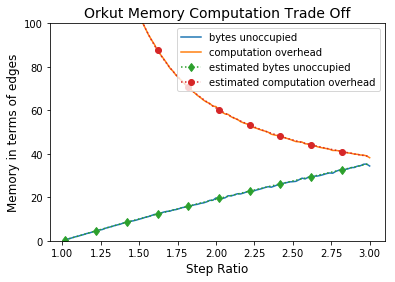

In [3]:
# data_location,list_of_funcs,range_for_x = np.linspace(1.02,3,100),
#               title = "",x_label = "", y_label = "", line_parameters = [],additional_functions = []
data_location = 'data/com-orkut.ungraphcounts.txt'
list_of_funcs =  [memory_overhead,computation_overhead,estimated_memory,estimated_computation]
title = "Orkut Memory Computation Trade Off"
x_label = 'Step Ratio'
y_label = 'Memory in terms of edges'
LineParams  = [[None,'bytes unoccupied'],[None,'computation overhead'],
                    [':d','estimated bytes unoccupied'],[':o','estimated computation overhead']]
additional_functions = [lambda : plt.ylim(0,100)]
MakeDiagram(data_location,list_of_funcs,title = title, x_label = x_label,\
            y_label = y_label, line_parameters = LineParams,additional_functions = additional_functions)

plt.show()

alpha = 2.066606331495111


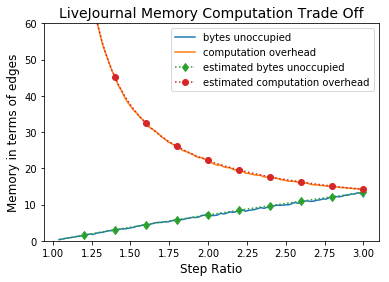

In [3]:
data_location = 'data/soc-LiveJournal1counts.txt'
list_of_funcs =  [memory_overhead,computation_overhead,estimated_memory,estimated_computation]
title = "LiveJournal Memory Computation Trade Off"
x_label = 'Step Ratio'
y_label = 'Memory in terms of edges'
LineParams  = [[None,'bytes unoccupied'],[None,'computation overhead'],
                    [':d','estimated bytes unoccupied'],[':o','estimated computation overhead']]
additional_functions = [lambda : plt.ylim(0,60)]
x_range = []
for j in range(99):
    x_range.append(3-j*.02)
MakeDiagram(data_location,list_of_funcs, range_for_x=x_range, title = title, x_label = x_label,\
            y_label = y_label, line_parameters = LineParams,additional_functions = additional_functions)
plt.show()

In [10]:
data_location = 'data/soc-LiveJournal1counts.txt'
list_of_funcs =  [occupancy,estimated_occupancy]
title = "LiveJournal Occupancy"
x_label = 'Step Ratio'
y_label = 'Ratio of Memory Occupied'
LineParams  = [[None,'occupancy'],[None,'estimated occupancy']]
additional_functions = []
MakeDiagram(data_location,list_of_funcs,title = title, x_label = x_label,\
            y_label = y_label, line_parameters = LineParams,additional_functions = additional_functions)
plt.show()

alpha = 2.066606331495111


KeyboardInterrupt: 

In [ ]:
data_location = 'data/com-orkut.ungraphcounts.txt'
list_of_funcs =  [occupancy,estimated_occupancy]
title = "Orkut Occupancy"
x_label = 'Step Ratio'
y_label = 'Ratio of Memory Occupied'
LineParams  = [[None,'occupancy'],[None,'estimated occupancy']]
additional_functions = []
MakeDiagram(data_location,list_of_funcs,title = title, x_label = x_label,\
            y_label = y_label, line_parameters = LineParams,additional_functions = additional_functions)
plt.show()

0.8232966566912501
0.6857228432939062
0.13757381339734387


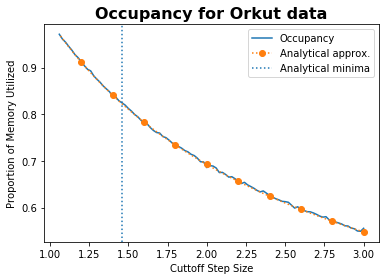

<Figure size 432x288 with 0 Axes>

In [4]:
result_Live = 1.4726406179191747
result_Orkut = 1.4607622094308736

# data_location,list_of_funcs,range_for_x = np.linspace(1.02,3,100),
#               title = "",x_label = "", y_label = "", line_parameters = [],additional_functions = []
data_location = 'data/com-orkut.ungraphcounts.txt'
list_of_funcs =  [memory_overhead,computation_overhead,cost,estimated_memory,estimated_computation,estimated_cost]
title = "Orkut Memory Computation Trade Off"
x_label = 'Step Ratio'
y_label = 'Memory in terms of edges'
LineParams  = [[None,'memory overhead'],[None,'computation overhead'],[None,'cost function, beta = {}'.format(beta)],
                    [':d','estimated memory overhead'],[':o','estimated computation overhead'],[':v','estimated cost function']]
additional_functions = [lambda : plt.axvline(x=result_Orkut,linestyle = ':',label = "Analytical minima")]
MakeDiagram(data_location,list_of_funcs,title = title, x_label = x_label, y_label = y_label, line_parameters = LineParams)
plt.show()

plt.plot(X,Y1,label = "Occupancy")
plt.plot(X,_Y1,'o:',markevery = 10,label = "Analytical approx.")
#plt.plot(X,_Y2)

# Add legend
plt.legend(loc='upper right')
# Add title and x, y labels
plt.title("Occupancy for Orkut data", fontsize=16, fontweight='bold')
plt.suptitle("", fontsize=10)
plt.xlabel("Cuttoff Step Ratio")
plt.ylabel("Proportion of Memory Utilized")
plt.show()
plt.savefig('results/ungraph_occupancy.png')    
    

0.825481959659864
0.6724860577646703
0.15299590189519374


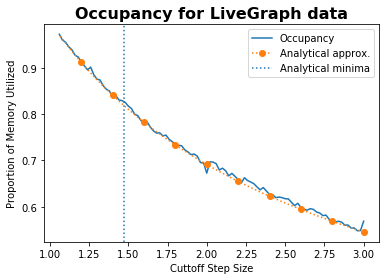

<Figure size 432x288 with 0 Axes>

In [8]:
import importlib
resources = importlib.import_module("resources")
import resources.MonteCarlo as MC

import numpy as np
import pandas as pd
import math
from functools import reduce
import random
random.seed(2010)

import matplotlib.pyplot as plt
%matplotlib inline


def cost_powers_k(rv, k = 2):
    assert(k!=1)
    if k == 2:
        cutoff = 1<<(int(rv)).bit_length()
    else:
        cutoff = k**(math.ceil(math.log(rv, k)))
    space_cost = cutoff-rv
    time_cost = (cutoff - 1)*1.0/(k-1)
    return (space_cost,time_cost,rv)

def sum_pair_costs(iterator, n,verbose = True):
    sum1,sum2,sum3 = reduce(lambda x,y : (x[0]+y[0],x[1]+y[1],x[2]+y[2]),\
                                        iterator,(0,0,0))
    return (sum1/n,sum2/n,sum3/n)

def my_iter(i,my_list):
    for x in my_list:
        yield cost_powers_k(x,i)
occupancy = lambda a : lambda x : ((1-a)/(2-a))*((1-x)/(x-x**(2-a))+1)

        

val_array = []
n = 0
beta = .1
alpha =  2.068
result_Live = 1.4726406179191747
result_Orkut = 1.4607622094308736

with open('data/soc-LiveJournal1counts.txt','r') as f:
    for line in f:
        v1,v2 = line.split(',')
        i = int(v2)
        a = int(v1)
        if a<1:
            continue
        n+=i
        while (i>0):
            i-=1
            val_array.append(a)

X  = []
Y1 = []
_Y1 = []

for j in range(98):
    i = 3-j/50
    #print ("i = {}".format(i))

    cost_f = lambda x : cost_powers_k(x,i)
    y1, y2, y3 = sum_pair_costs(my_iter(i,val_array), n, verbose = False)
    X.append(i)
    Y1.append(y3/(y1+y3))
    _Y1.append(occupancy(alpha)(i))
    if i==2:
        default_occ = y3/(y1+y3)
i = result_Live
cost_f = lambda x : cost_powers_k(x,i)
y1, y2, y3 = sum_pair_costs(my_iter(i,val_array), n, verbose = False)
new_occ = y3/(y1+y3)
print(new_occ)
print(default_occ)
print(new_occ-default_occ)
plt.plot(X,Y1,label = "Occupancy")
plt.plot(X,_Y1,'o:',markevery = 10,label = "Analytical approx.")
#plt.plot(X,_Y2)
plt.axvline(x=result_Live,linestyle = ':',label = "Analytical minima")
# Add legend
plt.legend(loc='upper right')
# Add title and x, y labels
plt.title("Occupancy for LiveGraph data", fontsize=16, fontweight='bold')
plt.suptitle("", fontsize=10)
plt.xlabel("Cuttoff Step Size")
plt.ylabel("Proportion of Memory Utilized")
plt.show()
plt.savefig('results/Live_occupancy.png')    
    

In [16]:
n = 0
beta = .1
alpha =  2.0239
result_Live = 1.4726406179191747
result_Orkut = 1.4607622094308736
val_array = []

with open('data/com-orkut.ungraphcounts.txt','r') as f:
    for line in f:
        v1,v2 = line.split(',')
        i = int(v2)
        a = int(v1)
        if a<1:
            continue
        n+=i
        while (i>0):
            i-=1
            val_array.append(a)

X  = []
Y1 = []
_Y1 = []
i = result_Orkut
cost_f = lambda x : cost_powers_k(x,i)
y1, y2, y3 = sum_pair_costs(my_iter(i,val_array), n, verbose = False)
new_comp = y2
i = 2
cost_f = lambda x : cost_powers_k(x,i)
y1, y2, y3 = sum_pair_costs(my_iter(i,val_array), n, verbose = False)
default_comp = y2

print(new_comp)
print(default_comp)
print(default_comp/new_comp)



111.26128720643824
61.750712355325774
0.5550062731231148


In [15]:
n = 0
beta = .1
alpha =  2.0239
result_Live = 1.4726406179191747
result_Orkut = 1.4607622094308736
val_array = []

with open('data/soc-LiveJournal1counts.txt','r') as f:
    for line in f:
        v1,v2 = line.split(',')
        i = int(v2)
        a = int(v1)
        if a<1:
            continue
        n+=i
        while (i>0):
            i-=1
            val_array.append(a)

X  = []
Y1 = []
_Y1 = []
i = result_Live
cost_f = lambda x : cost_powers_k(x,i)
y1, y2, y3 = sum_pair_costs(my_iter(i,val_array), n, verbose = False)
new_comp = y2
i = 2
cost_f = lambda x : cost_powers_k(x,i)
y1, y2, y3 = sum_pair_costs(my_iter(i,val_array), n, verbose = False)
default_comp = y2

print(new_comp)
print(default_comp)
print(default_comp/new_comp)



38.92825870830219
22.812519670638086
0.586014387172496


In [1]:

def func():
    global gList    
    gList = ['p']
func()
print(gList)


['p']
